In [147]:
import pandas as pd
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.ticker import PercentFormatter

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lukaszberwid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lukaszberwid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data loading

In [3]:
df = pd.read_csv('sentiment_movies.csv', engine='python')

In [4]:
df.head()

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


## Review type distribution

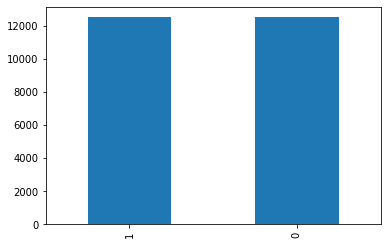

In [5]:
df['Sentiment'].value_counts().plot(kind='bar')

## Example values

In [6]:
df['SentimentText']

0        first think another Disney movie, might good, ...
1        Put aside Dr. House repeat missed, Desperate H...
2        big fan Stephen King's work, film made even gr...
3        watched horrid thing TV. Needless say one movi...
4        truly enjoyed film. acting terrific plot. Jeff...
                               ...                        
24995    kid 50's 60's anything connected Disney defini...
24996    course reading review seen film already. 'Raja...
24997    read "There's Girl Soup" came Peter Sellers's ...
24998    film quite boring. snippets naked flesh tossed...
24999    Although film somewhat filled eighties cheese ...
Name: SentimentText, Length: 25000, dtype: object

## Clearing out non alpha characters / html tags

In [7]:
#cleaning out data
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

df['SentimentText'] = df['SentimentText'].str.lower()
df['SentimentText'] = df['SentimentText'].apply(lambda x: REPLACE_NO_SPACE.sub("", x.lower()))
df['SentimentText'] = df['SentimentText'].apply(lambda x: REPLACE_WITH_SPACE.sub("", x.lower()))

In [8]:
df['SentimentText'] 

0        first think another disney movie might good it...
1        put aside dr house repeat missed desperate hou...
2        big fan stephen kings work film made even grea...
3        watched horrid thing tv needless say one movie...
4        truly enjoyed film acting terrific plot jeff c...
                               ...                        
24995    kid 50s 60s anything connected disney definiti...
24996    course reading review seen film already raja b...
24997    read theres girl soup came peter sellerss low ...
24998    film quite boring snippets naked flesh tossed ...
24999    although film somewhat filled eighties cheese ...
Name: SentimentText, Length: 25000, dtype: object

# Most frequent words for positive / negative reviews

In [211]:
def showWordCloud(words, title):
    wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(words)
    plt.figure(figsize=(12,10))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

def showWordCloudFromFreq(words, title, reverse):
    d = {}
    for word in words:
        d[word[0]] = ((-1, 1)[reverse]) * word[1]
        
    wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate_from_frequencies(d)
    plt.figure(figsize=(12,10))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

TOP_N = 20

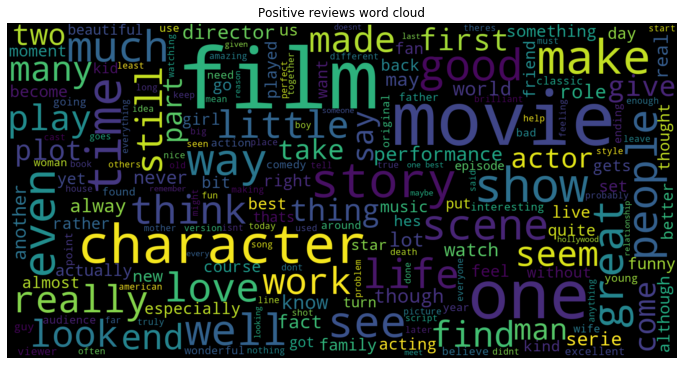

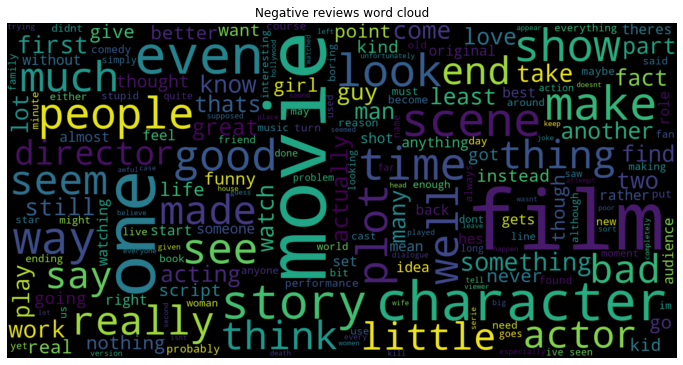

In [32]:
showWordCloud(" ".join(df.loc[df['Sentiment'] == 1]["SentimentText"]), 'Positive reviews word cloud')
showWordCloud(" ".join(df.loc[df['Sentiment'] == 0]["SentimentText"]), 'Negative reviews word cloud')

In [9]:
positive = pd.DataFrame(np.array(Counter(" ".join(df.loc[df['Sentiment'] == 1]["SentimentText"]).split()).most_common(TOP_N)), columns=['word', 'count'])
negative = pd.DataFrame(np.array(Counter(" ".join(df.loc[df['Sentiment'] == 0]["SentimentText"]).split()).most_common(TOP_N)), columns=['word', 'count'])
print('Most common words in positive reviews')
print(positive)
print('Most common words in negative reviews')
print(negative)

Most common words in positive reviews
      word  count
0     film  19591
1    movie  18128
2      one  12867
3     like   8682
4      its   8163
5     good   7366
6    story   6470
7    great   6250
8     time   5998
9      see   5809
10    well   5487
11  really   5430
12    also   5421
13   would   5283
14      it   5210
15    even   4820
16    much   4576
17   first   4559
18  people   4299
19   films   4261
Most common words in negative reviews
      word  count
0    movie  23659
1     film  17861
2      one  12273
3     like  10874
4      its   8210
5     even   7504
6     good   7137
7      bad   7058
8    would   6836
9   really   6192
10    time   5780
11      it   5528
12     see   5363
13    dont   5022
14     get   4975
15    much   4968
16   story   4953
17  people   4621
18   could   4542
19    make   4540


# Filtering out noise

In [10]:
stop_words = [word.replace('\'', '') for word in set(stopwords.words('english'))]
df['tokenized'] = df['SentimentText'].apply(lambda x: set(word_tokenize(x)) - set(stop_words))

# Most frequent words for positive / negative reviews after filtering

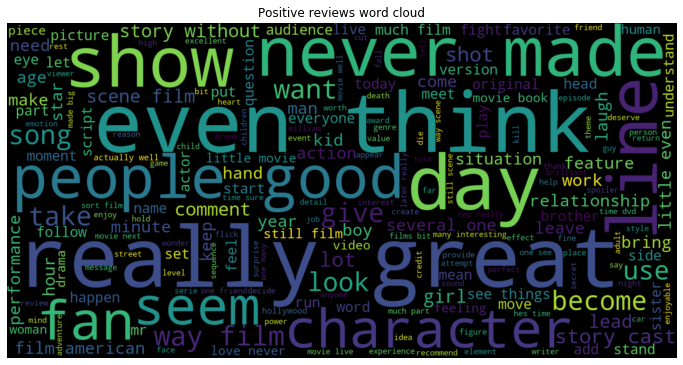

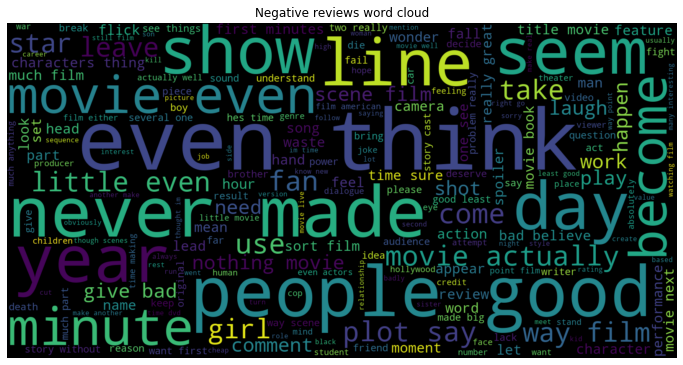

In [34]:
showWordCloud(" ".join(df.loc[df['Sentiment'] == 1]["tokenized"].apply(lambda x: " ".join(x))), 'Positive reviews word cloud')
showWordCloud(" ".join(df.loc[df['Sentiment'] == 0]["tokenized"].apply(lambda x: " ".join(x))), 'Negative reviews word cloud')

In [11]:
positive = pd.DataFrame(np.array(Counter(" ".join(df.loc[df['Sentiment'] == 1]["tokenized"].apply(lambda x: " ".join(x))).split()).most_common(TOP_N)), columns=['word', 'count'])
negative = pd.DataFrame(np.array(Counter(" ".join(df.loc[df['Sentiment'] == 0]["tokenized"].apply(lambda x: " ".join(x))).split()).most_common(TOP_N)), columns=['word', 'count'])
print('Most common words in positive reviews')
print(positive)
print('Most common words in negative reviews')
print(negative)

Most common words in positive reviews
      word count
0      one  6914
1     film  6912
2    movie  6884
3     like  5251
4     good  4640
5    great  4143
6     time  4128
7    story  4074
8      see  4072
9     well  3852
10    also  3731
11   would  3590
12  really  3561
13    even  3403
14    much  3302
15   first  3243
16     get  3133
17    best  3091
18     way  2925
19  people  2914
Most common words in negative reviews
      word count
0    movie  8100
1      one  6762
2     film  6645
3     like  6154
4     even  4861
5     good  4757
6    would  4398
7      bad  4276
8     time  4139
9   really  4022
10     see  3847
11    much  3659
12     get  3574
13    make  3430
14   could  3400
15   story  3311
16    made  3291
17  acting  3223
18  people  3125
19    plot  3051


# Most meaningful words using CountVactorizer and LinearRegression 

In [213]:
tokenized_strings = df['tokenized'].apply(lambda x: " ".join(x))
cv = CountVectorizer(binary=True)
cv.fit(tokenized_strings)
data = cv.transform(tokenized_strings)

In [126]:
train_data, test_data, train_labels, test_labels = train_test_split(data, np.array(df['Sentiment']), train_size = 0.9, random_state=42)

In [151]:
labels = df['Sentiment']
cs = [x * 1.0 / 10.0 for x in range(1, 10, 1)]
scores = []
for c in cs:    
    lr = LogisticRegression(C=c, max_iter=1000)    # I had to modify the number of iterations 10 was not enough
    lr.fit(train_data, train_labels)
    score = accuracy_score(test_labels, lr.predict(test_data))
    print(f"preditcion {c}: accuracy {score}")
    scores.append(score)

preditcion 0.1: accuracy 0.8696
preditcion 0.2: accuracy 0.872
preditcion 0.3: accuracy 0.872
preditcion 0.4: accuracy 0.8704
preditcion 0.5: accuracy 0.87
preditcion 0.6: accuracy 0.8688
preditcion 0.7: accuracy 0.868
preditcion 0.8: accuracy 0.868
preditcion 0.9: accuracy 0.8676


Having to change max_iter parameter indicates that our matrix is really spare, ale

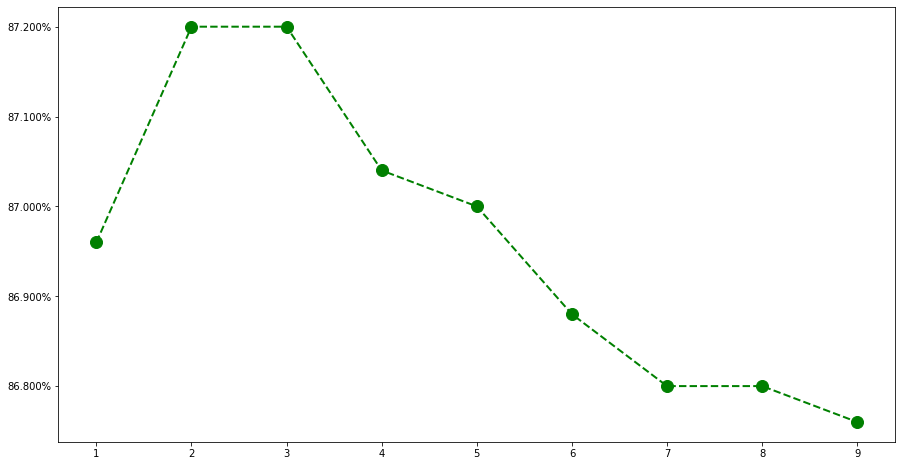

In [144]:
plt.figure(figsize=(15,8))
plt.title('accuracy for different c values')
plt.plot(cs, scores, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [210]:
c = cs[np.argmax(scores)]
lr = LogisticRegression(C=c, max_iter=1000)
score = lr.fit(train_data, train_labels)

In [203]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), lr.coef_[0]
    )
}

positive_words = [best_positive for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)]

negative_words = [best_negative for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])]

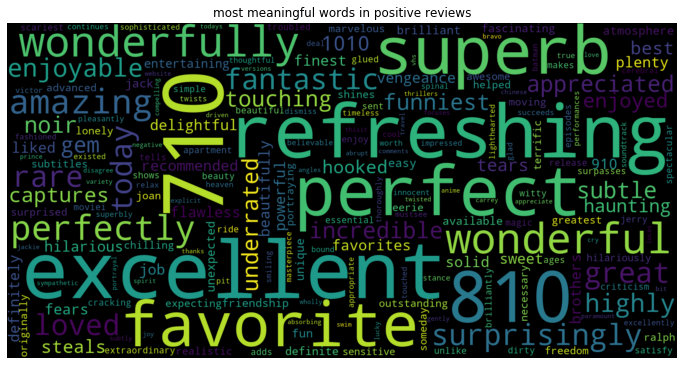

            word      coef
0            710  1.363580
1      excellent  1.213093
2     refreshing  1.027345
3            810  0.953459
4        perfect  0.911701
5         superb  0.897537
6       favorite  0.870995
7    wonderfully  0.859791
8      wonderful  0.848180
9      perfectly  0.837214
10       amazing  0.814366
11  surprisingly  0.793077
12          rare  0.785773
13         today  0.785560
14         great  0.754741
15     fantastic  0.754546
16         loved  0.748564
17     enjoyable  0.746781
18        highly  0.742228
19   appreciated  0.734419


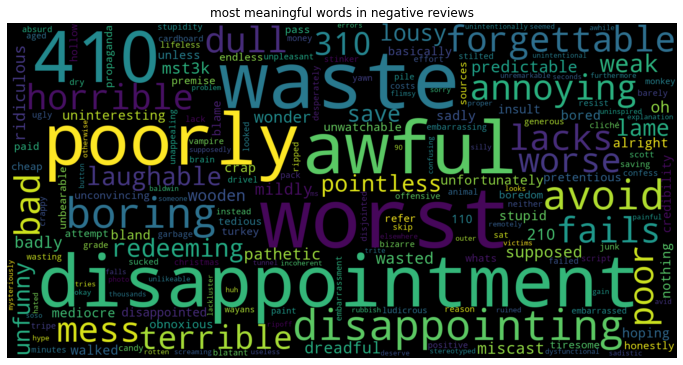

              word      coef
0            worst -1.785396
1            waste -1.629317
2            awful -1.306808
3   disappointment -1.304114
4           poorly -1.294088
5              410 -1.289890
6    disappointing -1.062415
7           boring -1.031203
8            avoid -0.973397
9      forgettable -0.959637
10            mess -0.950629
11            dull -0.940567
12        annoying -0.907351
13           lacks -0.905486
14           fails -0.904350
15        horrible -0.898985
16             bad -0.889295
17           worse -0.859671
18            poor -0.854804
19        terrible -0.847007


In [212]:
showWordCloudFromFreq(positive_words, 'most meaningful words in positive reviews', reverse=True)
print(pd.DataFrame(positive_words[:TOP_N], columns=['word', 'coef']))
showWordCloudFromFreq(negative_words, 'most meaningful words in negative reviews', reverse=False)
print(pd.DataFrame(negative_words[:TOP_N], columns=['word', 'coef']))

# Most meaningful groups of words (2 to 5)

In [222]:
cv = CountVectorizer(binary=True, ngram_range=(2, 2))
cv.fit(tokenized_strings)
data = cv.transform(tokenized_strings)

In [262]:
list(cv.vocabulary_.items())[:TOP_N]

[('perfect 10', 824897),
 ('10 clark', 255),
 ('clark ages', 203970),
 ('ages hilarious', 39839),
 ('hilarious superb', 527363),
 ('superb danny', 1092428),
 ('danny another', 269042),
 ('another help', 63555),
 ('help still', 520073),
 ('still part', 1068943),
 ('part disney', 813624),
 ('disney believable', 309824),
 ('believable movie', 115162),
 ('movie think', 737587),
 ('think 1010', 1130368),
 ('1010 later', 1177),
 ('later lloyd', 627859),
 ('lloyd glover', 656064),
 ('glover watch', 475933),
 ('watch enjoy', 1222592)]

In [223]:
train_data, test_data, train_labels, test_labels = train_test_split(data, np.array(df['Sentiment']), train_size = 0.9, random_state=42)

In [224]:
labels = df['Sentiment']
cs = [x * 1.0 / 10.0 for x in range(1, 10, 1)]
scores = []
for c in cs:    
    lr = LogisticRegression(C=c, max_iter=1000)    
    lr.fit(train_data, train_labels)
    score = accuracy_score(test_labels, lr.predict(test_data))
    print(f"preditcion {c}: accuracy {score}")
    scores.append(score)

preditcion 0.1: accuracy 0.7624
preditcion 0.2: accuracy 0.764
preditcion 0.3: accuracy 0.7676
preditcion 0.4: accuracy 0.768
preditcion 0.5: accuracy 0.7704
preditcion 0.6: accuracy 0.7708
preditcion 0.7: accuracy 0.7708
preditcion 0.8: accuracy 0.7728
preditcion 0.9: accuracy 0.7736


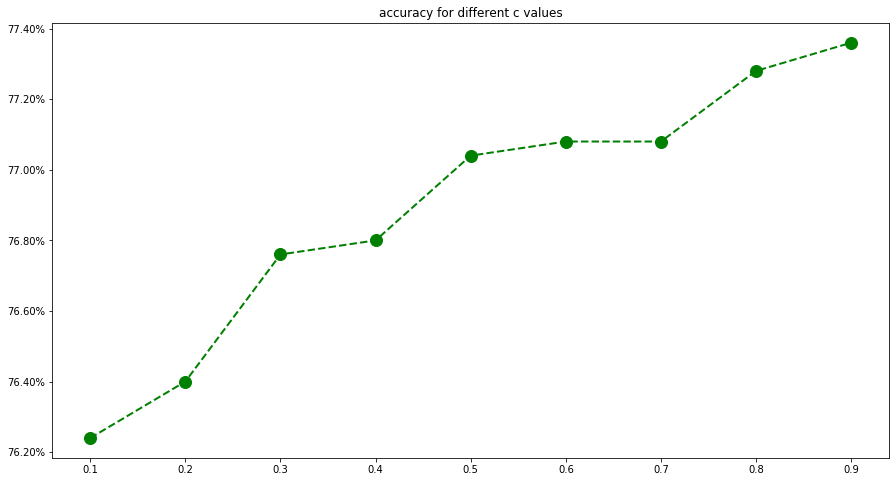

In [225]:
plt.figure(figsize=(15,8))
plt.title('accuracy for different c values')
plt.plot(cs, scores, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [226]:
c = cs[np.argmax(scores)]
lr = LogisticRegression(C=c, max_iter=1000)
score = lr.fit(train_data, train_labels)

In [227]:
positive_words = [best_positive for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)]

negative_words = [best_negative for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])]

In [228]:
print(pd.DataFrame(positive_words[:TOP_N], columns=['word', 'coef']))
print(pd.DataFrame(negative_words[:TOP_N], columns=['word', 'coef']))

            word      coef
0            710  1.363580
1      excellent  1.213093
2     refreshing  1.027345
3            810  0.953459
4        perfect  0.911701
5         superb  0.897537
6       favorite  0.870995
7    wonderfully  0.859791
8      wonderful  0.848180
9      perfectly  0.837214
10       amazing  0.814366
11  surprisingly  0.793077
12          rare  0.785773
13         today  0.785560
14         great  0.754741
15     fantastic  0.754546
16         loved  0.748564
17     enjoyable  0.746781
18        highly  0.742228
19   appreciated  0.734419
              word      coef
0            worst -1.785396
1            waste -1.629317
2            awful -1.306808
3   disappointment -1.304114
4           poorly -1.294088
5              410 -1.289890
6    disappointing -1.062415
7           boring -1.031203
8            avoid -0.973397
9      forgettable -0.959637
10            mess -0.950629
11            dull -0.940567
12        annoying -0.907351
13           lacks -0.90548